# OSEMN DS Model

<hr style="border:1px solid gray"> </hr>

## Business Problem


<img src="images/USAA-logo.png"/>


USAA wants to determine which house features should affect their home insurance premiums. In this project, linear regression models will be used to analyze which home features (square footage, condition, etc.) best determine house prices. Recommendations will be made to determine which features should raise, lower, or not affect premiums.

<hr style="border:1px solid gray"> </hr>

## Obtain Data
- Understand stakeholder requirements
- Gather information on the problem
- Source data necessary for the problem and understand it 

**Business Problem:** 

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings(action= 'ignore', category= UserWarning)

In [200]:
df = pd.read_csv('data/kc_house_data.csv')
pd.set_option('display.max_columns', 50) #view all columns
print(df.shape)
df.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Column Names and descriptions for Kings County Data Set**
* **id** - unique identifier for a house
* **date** - date house was sold
* **price** - price: prediction target
* **bedrooms** - number of Bedrooms/House
* **bathrooms** - number of bathrooms/bedrooms
* **sqft_living** - sqft footage of the home
* **sqft_lot** - sqft footage of the lot
* **floors** - total floors (levels) in house
* **waterfront** - house has a view to a waterfront
* **view** - has been view
* **condition** - house condition (quality)
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - sqft house apart from basement
* **sqft_basement** - sqft of basement
* **yr_built** - year built
* **yr_renovated** - year house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - sqft of interior housing living space of 15 nearest neighbors
* **sqft_lot15** - sqft of the land lots of 15 nearest neighbors

<hr style="border:1px solid gray"> </hr>

## Scrub Data
- Identify and deal with null/missing values
- Deal with outliers
- Normalize/Standardize data
- Feature engineering/selection
- One-hot encode categorical variables (often done after EDA)

#### Drop duplicates
Check rows and identifiers ('id')

In [202]:
print(df.duplicated().sum())
print(df['id'].duplicated(keep = False).sum())
# for col in df.columns:
#    print(f'{col}: ', df[col].duplicated().sum())

0
353


In [203]:
# df.set_index('id', inplace = True)
df_id_dups = df[df.duplicated('id', keep=False)]
df_id_dups

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,3,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,3,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,3,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,3,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


The only difference between the duplicate id entries is the price, so it's likely and update was just being made for price sold or the house was quickly flipped within a year. Regardless, we'll keep the last entry.

In [204]:
df.drop_duplicates('id', keep='last', inplace= True)
df['id'].duplicated().sum()

0

#### Dealing with data types
Investigate and deal with String/Object columns, 'date' and 'sqft_basement'

In [205]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.593651
?         0.021102
600.0     0.010084
700.0     0.009617
500.0     0.009617
            ...   
283.0     0.000047
295.0     0.000047
2050.0    0.000047
2850.0    0.000047
602.0     0.000047
Name: sqft_basement, Length: 304, dtype: float64

Turn '?' into appropriate missing value (np.NaN), so we can convert column into float 64.

In [206]:
df['sqft_basement'].replace(to_replace='?', value=np.NaN, inplace = True)
df['sqft_basement'].value_counts(normalize=True, dropna=False)    # see how many rows are missing values

0.0       0.593651
NaN       0.021102
600.0     0.010084
500.0     0.009617
700.0     0.009617
            ...   
283.0     0.000047
295.0     0.000047
1008.0    0.000047
2050.0    0.000047
2130.0    0.000047
Name: sqft_basement, Length: 304, dtype: float64

In [207]:
df['date'] = pd.to_datetime(df['date'])
df = df.astype({'sqft_basement':'float64'})
display(df.head())
df.info()    # check data types again

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   price          21420 non-null  float64       
 3   bedrooms       21420 non-null  int64         
 4   bathrooms      21420 non-null  float64       
 5   sqft_living    21420 non-null  int64         
 6   sqft_lot       21420 non-null  int64         
 7   floors         21420 non-null  float64       
 8   waterfront     19067 non-null  float64       
 9   view           21357 non-null  float64       
 10  condition      21420 non-null  int64         
 11  grade          21420 non-null  int64         
 12  sqft_above     21420 non-null  int64         
 13  sqft_basement  20968 non-null  float64       
 14  yr_built       21420 non-null  int64         
 15  yr_renovated   1760

#### Filling Missing Values

In [208]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3813
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [209]:
for col in df.columns:    # loop through columns
    print(f'"{col}" Value Counts:\n',
          df[col].value_counts(normalize=True).head(),
          '\n NumUnique:', df[col].nunique(), '\n')
# set ascending parameter to False for possible extraneuous values

"id" Value Counts:
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
Name: id, dtype: float64 
 NumUnique: 21420 

"date" Value Counts:
 2014-06-23    0.006629
2014-06-25    0.006069
2014-06-26    0.005929
2015-04-27    0.005882
2015-03-25    0.005742
Name: date, dtype: float64 
 NumUnique: 372 

"price" Value Counts:
 450000.0    0.008030
350000.0    0.007796
550000.0    0.007330
500000.0    0.007049
425000.0    0.006956
Name: price, dtype: float64 
 NumUnique: 3595 

"bedrooms" Value Counts:
 3    0.454295
4    0.319748
2    0.127731
5    0.074043
6    0.012372
Name: bedrooms, dtype: float64 
 NumUnique: 12 

"bathrooms" Value Counts:
 2.50    0.249860
1.00    0.177124
1.75    0.140990
2.25    0.094818
2.00    0.089309
Name: bathrooms, dtype: float64 
 NumUnique: 29 

"sqft_living" Value Counts:
 1300    0.006349
1440    0.006209
1400    0.006162
1660    0.005976
1800    0.005976
Name: sqft_living, dtype: float64 
 Num

We can see most of the values (90-99%) are 0.0 for 3 of the 4 columns containing missing values. The other column, 'sqft_basement', has 60% 0.0's, but with only 2.1% of the data missing, it should be okay to fill these few missing values with the mode. It is also safer to assume NaN's mean there's no basement.

In [210]:
for col in ['view','sqft_basement','waterfront','yr_renovated']:    # loop through missing columns
    df[col] = df[col].fillna(value=0.0)    # fill missing values with 0.0


Notes on value/unique counts:

Possible Binning/Binary:
- 'bedrooms': 45%: 3, 32%: 4
- 'bathrooms'
- 'sqft_basement': 62%: 0
- 'floors': 50%: 1, 38%: 2
- 'condition': 65%: 3, 26%: 4
- 'grade': 41%: 7, 28%: 8, 21%: >8
- 'view': 90%: 0
- 'yr_renovated': 96%: 0


#### Dealing with outliers and extraneous values

View descriptive stats and investigate for extraneous values and a general idea of variable distributions

In [211]:
df.describe(include='all', datetime_is_numeric=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,21420,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,2014-10-29 17:13:04.537815040,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,1791.170215,285.937021,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
min,1.000102e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,2014-07-22 00:00:00,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,2014-10-17 00:00:00,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-18 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876761e+09,NaN,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,828.692965,440.012962,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867


Notes (also using value counts a few codes above to investigate extraneous values by setting ascending parameter to True): 
- bedrooms > 9
- bathrooms > 6.5

In [212]:
df[(df['bedrooms'] > 9)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


In [213]:
df[(df['bathrooms'] > 6.5)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4020,9175600025,2014-10-07,800000.0,7,6.75,7480,41664,2.0,0.0,2.0,3,11,5080,2400.0,1953,0.0,98166,47.4643,-122.368,2810,33190
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
8085,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
8537,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,3,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
12764,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


Because these some of these rows are likely to be dropped later as they hold many obvious outliers, we will go ahead and drop them now.

In [214]:
print(len(df))
len(df[~((df['bedrooms'] == 33) | (df['bathrooms'] == 8))])

21420


21417

In [215]:
df=df[~((df['bedrooms'] == 33) | (df['bathrooms'] == 8))]

#### Bin/cut categorical variables
View value counts of categorical variables with multiple binning

In [216]:
df['bedrooms'].value_counts(normalize=True)

3     0.454359
4     0.319793
2     0.127749
5     0.074053
6     0.012327
1     0.008918
7     0.001728
8     0.000607
9     0.000280
10    0.000140
11    0.000047
Name: bedrooms, dtype: float64

In [217]:
df['bedrooms'].value_counts(normalize=True)

3     0.454359
4     0.319793
2     0.127749
5     0.074053
6     0.012327
1     0.008918
7     0.001728
8     0.000607
9     0.000280
10    0.000140
11    0.000047
Name: bedrooms, dtype: float64

In [218]:
df['condition'].value_counts(normalize=True)

3    0.648970
4    0.263436
5    0.078723
2    0.007564
1    0.001307
Name: condition, dtype: float64

In [219]:
df['grade'].value_counts(normalize=True)

7     0.414997
8     0.282066
9     0.121679
6     0.093150
10    0.052762
11    0.018490
5     0.010926
12    0.004062
4     0.001261
13    0.000560
3     0.000047
Name: grade, dtype: float64

Bin/cut into categories

In [220]:
# Binary
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x>0 else 0)
df['view'] = df['view'].apply(lambda x: 1 if x>0 else 0)
df['basement'] = df['sqft_basement'].apply(lambda x: 1 if x>0 else 0)
df['multilevel'] = df['floors'].apply(lambda x: 1 if x>1 else 0)
# Bins
df['bedrooms_bin'] = pd.cut(df['bedrooms'], bins=[0,2,3,4,100], labels=['one_two','three','four','five_plus'])
df['bathrooms_bin'] = pd.cut(df['bathrooms'], bins=[0,2,2.5,100], labels=['half_two','two_two_point_five','many'])
df['grade_bin'] = pd.cut(df['grade'], bins=[0,6,7,8,100], labels=['below_average','average','good','great'])

Sectors

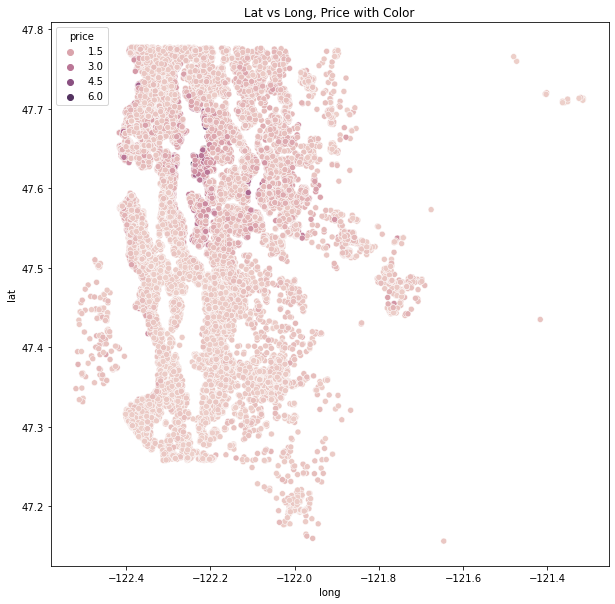

In [286]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='long',y='lat',hue='price',data=df)
plt.title('Lat vs Long, Price with Color');

In [222]:
df['lat_long'] = list(zip(df.lat, df.long))

In [223]:
df['quadrant'] = df['lat_long'].apply(lambda x: 'NW' if (x[0]>= 47.5) & (x[1]< -122.2) 
                                    else ('NE' if (x[0]>= 47.5) & (x[1]>= -122.2)
                                    else ('SW' if (x[0]< 47.5) & (x[1]< -122.2) else 'SE')))
df['nrth_sth'] = df['lat_long'].apply(lambda x: 'N' if (x[0]>= 47.5) else 'S')

# ('NE' if (x[0]>= 47.5) & (x[1]>= -122.1 else 'SW'))
# ('SW' if (x[0]< 47.5) & (x[1]< -122.1 else 'SE')
# df['sector_NW'] = df['lat_long'].apply(lambda x: 1 if (x[0]>= 47.5) & (x[1]< -122.1) else 0) # NW 
# df['sector_NE'] = df['lat_long'].apply(lambda x: 1 if (x[0]>= 47.5) & (x[1]>= -122.1) else 0) # NE
# df['sector_SW'] = df['lat_long'].apply(lambda x: 1 if (x[0]< 47.5) & (x[1]< -122.1) else 0) # SW
# df['sector_SE'] = df['lat_long'].apply(lambda x: 1 if (x[0]< 47.5) & (x[1]>= -122.1) else 0) # SE

In [224]:
df['quadrant'].value_counts()

NW    9103
NE    5782
SE    3500
SW    3032
Name: quadrant, dtype: int64

In [225]:
# df.head(30)

Create more columns to see age, month, and quarter houses were sold

In [226]:
df['age'] = df['yr_built'].apply(lambda x: datetime.today().year - x)
df = df.set_index('date')
df['month'] = df.index.month
# df['month_name'] = df.index.month_name() # use if we want month name later
df = df.reset_index()
df['yr_quarter'] = pd.cut(df['month'], bins=[0,3,6,9,12], labels=['1','2','3','4'])
df.head(50)

,date,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement,multilevel,bedrooms_bin,bathrooms_bin,grade_bin,lat_long,quadrant,nrth_sth,age,month,yr_quarter
0,2014-10-13,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,0,three,half_two,average,"(47.5112, -122.257)",NW,N,66,10,4
1,2014-12-09,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,1,1,three,two_two_point_five,average,"(47.721000000000004, -122.319)",NW,N,70,12,4
2,2015-02-25,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0,0,one_two,half_two,below_average,"(47.7379, -122.23299999999999)",NW,N,88,2,1
3,2014-12-09,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,1,0,four,many,average,"(47.5208, -122.39299999999999)",NW,N,56,12,4
4,2015-02-18,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,0,three,half_two,good,"(47.6168, -122.045)",NE,N,34,2,1
5,2014-05-12,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0,1,0,four,many,great,"(47.6561, -122.005)",NE,N,20,5,2
6,2014-06-27,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,0,0,1,three,two_two_point_five,average,"(47.3097, -122.32700000000001)",SW,S,26,6,2
7,2015-01-15,2008000270,291850.0,3,1.50,1060,9711,1.0,0.0,0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0,0,0,three,half_two,average,"(47.4095, -122.315)",SW,S,58,1,1
8,2015-04-15,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0,1,0,three,half_two,average,"(47.5123, -122.337)",NW,N,61,4,2
9,2015-03-12,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0,0,1,three,two_two_point_five,average,"(47.3684, -122.031)",SE,S,18,3,1


View distributions and descriptive stats

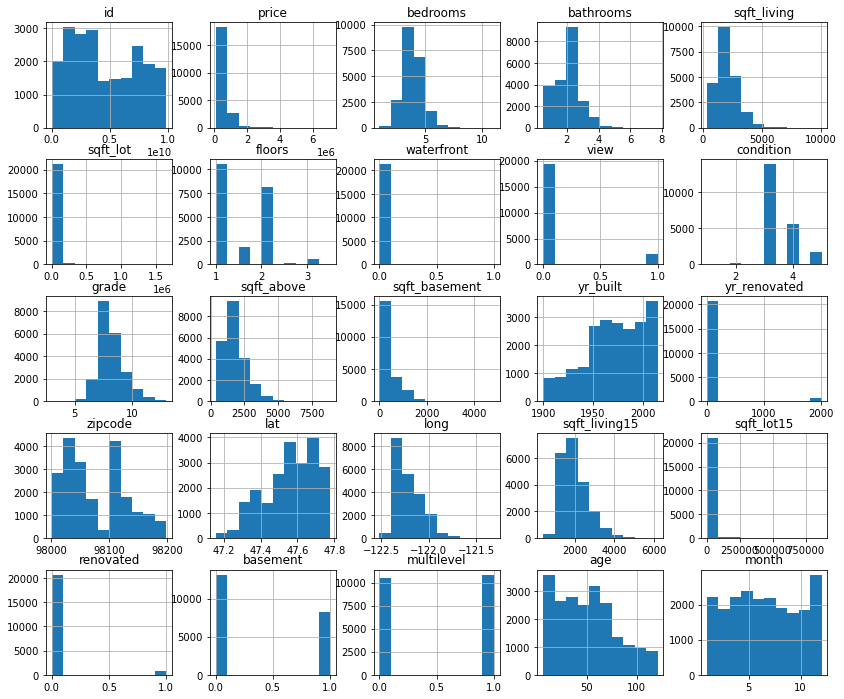

In [227]:
df.hist(figsize=(14,12));

In [228]:
df.describe(include='all', datetime_is_numeric=True)

,date,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement,multilevel,bedrooms_bin,bathrooms_bin,grade_bin,lat_long,quadrant,nrth_sth,age,month,yr_quarter
count,21417,2.141700e+04,2.141700e+04,21417.000000,21417.000000,21417.000000,2.141700e+04,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417,21417,21417,21417,21417,21417,21417.000000,21417.000000,21417
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,4,20815,4,2,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,three,half_two,average,"(47.5446, -122.01700000000001)",NW,N,NaN,NaN,2
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9731,10238,8888,4,9103,14885,NaN,NaN,6771
mean,2014-10-29 17:34:40.123266560,4.581096e+09,5.414415e+05,3.372274,2.117897,2082.153943,1.511422e+04,1.495891,0.006817,0.098146,3.410702,7.662371,1790.533035,285.594668,1971.095672,68.873605,98077.873232,47.560183,-122.213784,1988.190083,12766.707896,0.034505,0.385161,0.507354,NaN,NaN,NaN,NaN,NaN,NaN,49.904328,6.563945,NaN
min,2014-05-02 00:00:00,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,1.000000,NaN
25%,2014-07-22 00:00:00,2.123700e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,4.000000,NaN
50%,2014-10-17 00:00:00,3.904921e+09,4.505000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.000000,7620.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,46.000000,6.000000,NaN
75%,2015-02-18 00:00:00,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,98117.000000,47.678100,-122.125000,2370.000000,10086.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,9.000000,NaN
max,2015-05-27 00:00:00,9.900000e+09,7.060000e+06,11.000000,7.750000,10040.000000,1.651359e+06,3.500000,1.000000,1.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,121.000000,12.000000,NaN


#### Investigate/deal with multicollinearity

In [229]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement,multilevel,age,month
id,1.000000,-0.019053,0.001985,0.004485,-0.013260,-0.132444,0.018199,-0.003632,0.011113,-0.024285,0.006496,-0.011658,-0.004635,0.021272,-0.011068,-0.007959,-0.002709,0.019425,-0.003793,-0.139217,-0.011076,0.003144,0.021011,-0.021272,-0.011124
price,-0.019053,1.000000,0.316546,0.522922,0.699715,0.087892,0.255153,0.267530,0.355566,0.033828,0.668722,0.602773,0.316659,0.053211,0.114693,-0.051973,0.308721,0.020378,0.586175,0.081398,0.114364,0.178561,0.263648,-0.053211,-0.008893
bedrooms,0.001985,0.316546,1.000000,0.528186,0.594548,0.032327,0.182934,-0.002108,0.080422,0.022803,0.366936,0.492752,0.301905,0.160568,0.017535,-0.159697,-0.013178,0.136895,0.405537,0.030453,0.017259,0.159268,0.231475,-0.160568,-0.000653
bathrooms,0.004485,0.522922,0.528186,1.000000,0.754064,0.085483,0.501640,0.063867,0.173325,-0.129783,0.664987,0.684409,0.274019,0.508100,0.046025,-0.204432,0.022771,0.224124,0.568833,0.085473,0.045588,0.159160,0.467328,-0.508100,0.009226
sqft_living,-0.013260,0.699715,0.594548,0.754064,1.000000,0.169609,0.352641,0.105501,0.266126,-0.062119,0.763508,0.875722,0.423233,0.319214,0.048635,-0.200226,0.050380,0.241210,0.757607,0.180934,0.048393,0.200202,0.375025,-0.319214,0.013665
sqft_lot,-0.132444,0.087892,0.032327,0.085483,0.169609,1.000000,-0.006522,0.021482,0.067409,-0.008960,0.112591,0.180915,0.011920,0.052089,0.004987,-0.129423,-0.086178,0.230024,0.142636,0.717051,0.005100,-0.035647,0.012279,-0.052089,-0.002431
floors,0.018199,0.255153,0.182934,0.501640,0.352641,-0.006522,1.000000,0.020598,0.014573,-0.266870,0.457690,0.522815,-0.244698,0.489162,0.002704,-0.058508,0.048811,0.124680,0.278490,-0.012362,0.002623,-0.253150,0.904985,-0.489162,0.015743
waterfront,-0.003632,0.267530,-0.002108,0.063867,0.105501,0.021482,0.020598,1.000000,0.249231,0.016621,0.083002,0.072058,0.083634,-0.024853,0.074163,0.029185,-0.012259,-0.037886,0.083996,0.030720,0.074497,0.039374,0.021482,0.024853,0.008493
view,0.011113,0.355566,0.080422,0.173325,0.266126,0.067409,0.014573,0.249231,1.000000,0.046290,0.233010,0.149291,0.266814,-0.065331,0.080254,0.093525,0.008813,-0.089003,0.269912,0.064085,0.080369,0.188468,0.014924,0.065331,-0.006212
condition,-0.024285,0.033828,0.022803,-0.129783,-0.062119,-0.008960,-0.266870,0.016621,0.046290,1.000000,-0.150674,-0.162059,0.169406,-0.365031,-0.056517,0.004287,-0.015673,-0.107006,-0.095219,-0.003194,-0.056089,0.131107,-0.217649,0.365031,0.023883


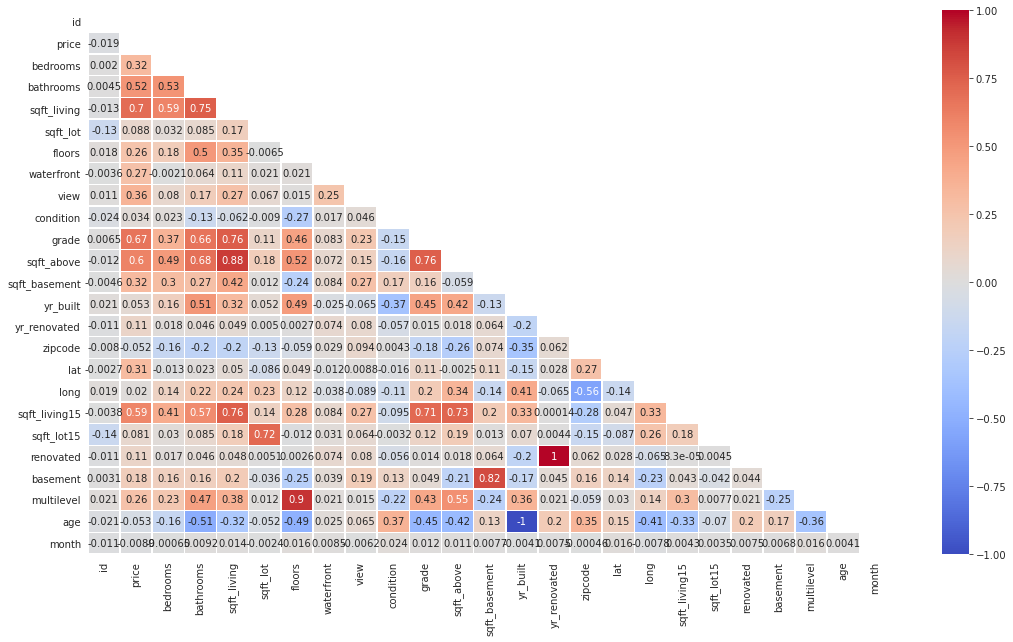

In [291]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 10))
    ax = sns.heatmap(df.corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, annot=True, vmin = -1, vmax=1)

Note possible multicollinear features:
- sqft_*** may all have multicollinearity with each other
- grade with bathrooms and sqft_living

Drop features for which another feature was made:
- 'yr_built','floors','yr_renovated','sqft_basement'

In [231]:
df_clean = df.drop(['yr_built','floors',
                    'yr_renovated','sqft_basement'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21417 non-null  datetime64[ns]
 1   id             21417 non-null  int64         
 2   price          21417 non-null  float64       
 3   bedrooms       21417 non-null  int64         
 4   bathrooms      21417 non-null  float64       
 5   sqft_living    21417 non-null  int64         
 6   sqft_lot       21417 non-null  int64         
 7   waterfront     21417 non-null  float64       
 8   view           21417 non-null  int64         
 9   condition      21417 non-null  int64         
 10  grade          21417 non-null  int64         
 11  sqft_above     21417 non-null  int64         
 12  zipcode        21417 non-null  int64         
 13  lat            21417 non-null  float64       
 14  long           21417 non-null  float64       
 15  sqft_living15  2141

Recheck heatmap for multicollinearity

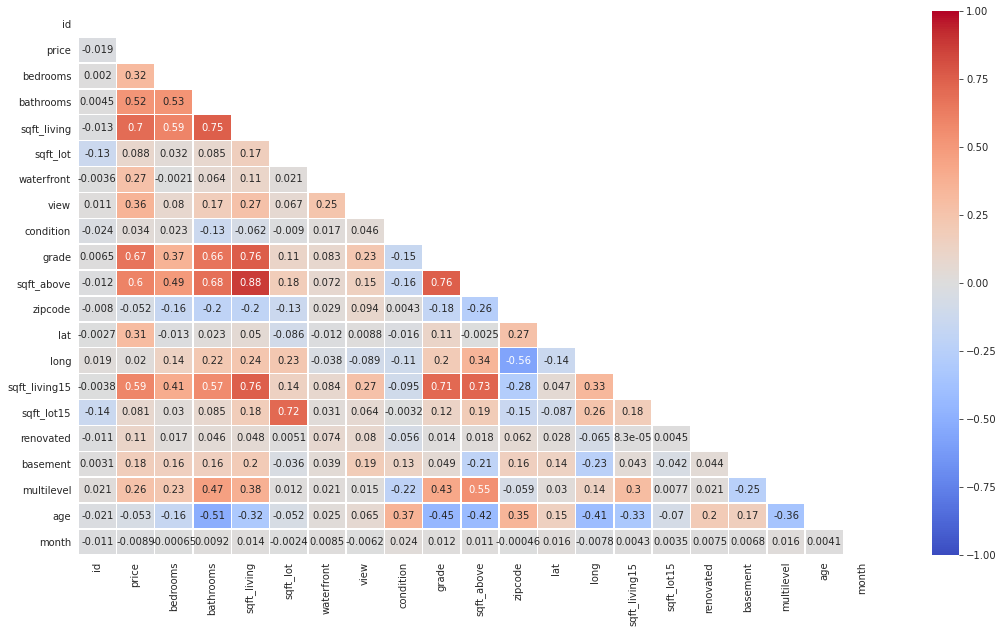

In [279]:
mask = np.zeros_like(df_clean.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 10))
    ax = sns.heatmap(df_clean.corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, annot=True, vmin = -1, vmax=1)

Note: When modeling keep in mind the multicollinearity grade has with sqft_living

#### Save cleaned data to csv

In [233]:
df_clean.to_csv('data/clean_data.csv')

#### Save vizualizations

In [238]:
df_clean.columns

Index(['date', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'basement', 'multilevel', 'bedrooms_bin', 'bathrooms_bin', 'grade_bin',
       'lat_long', 'quadrant', 'nrth_sth', 'age', 'month', 'yr_quarter'],
      dtype='object')

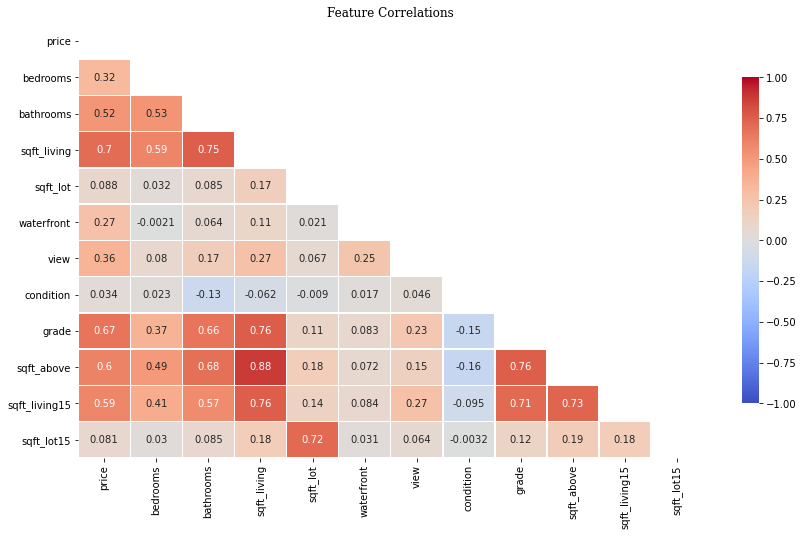

In [285]:
df_heatmap = df_clean[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_living15', 'sqft_lot15']]
mask = np.zeros_like(df_heatmap.corr())
mask[np.triu_indices_from(mask)] = True
sns.axes_style("white")
f, ax = plt.subplots(figsize=(14, 8))
ax = sns.heatmap(df_heatmap.corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, annot=True, vmin = -1, vmax=1, cbar_kws = {"shrink": .75})
plt.title("Feature Correlations", fontfamily = 'serif')
plt.savefig('images/heatmap.png')

#### Notes and extra code

In [32]:
# df['month'] = df.date_dateformat.dt.month